[[Model]]
    (Model(constant) + Model(lorentzian))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 41
    # data points      = 11
    # variables        = 4
    chi-square         = 0.01619690
    reduced chi-square = 0.00231384
    Akaike info crit   = -63.7291379
    Bayesian info crit = -62.1375568
    R-squared          = 0.95923156
[[Variables]]
    c:          0.12691568 +/- 0.03279347 (25.84%) (init = 0.3807273)
    amplitude:  0.65893745 +/- 0.10576348 (16.05%) (init = 0.516)
    center:     35.3465936 +/- 0.02231333 (0.06%) (init = 35.3)
    sigma:      0.36047583 +/- 0.05703187 (15.82%) (init = 0.3)
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = +0.8739
    C(c, amplitude)     = -0.8724
    C(c, sigma)         = -0.6637


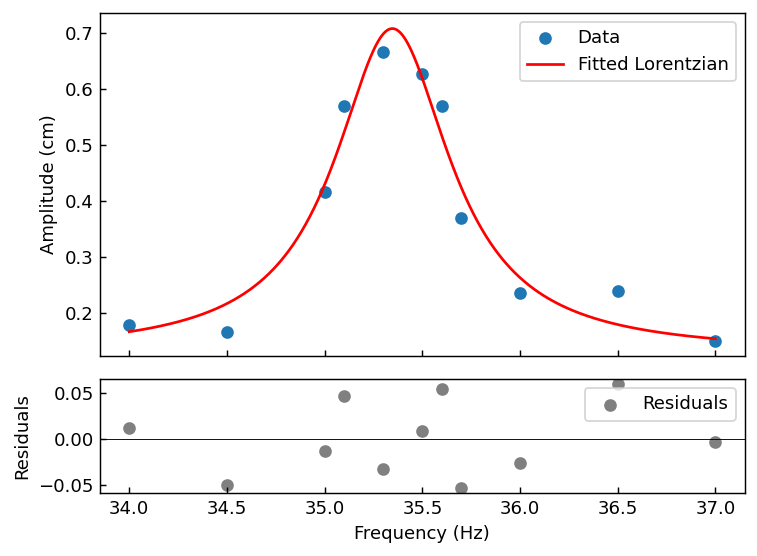

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from lmfit.models import LorentzianModel, ConstantModel
from lmfit import Parameters

# Read data from Excel file
df = pd.read_excel('data.xlsx', sheet_name='Sheet1')

# Get x and y column data
x = df['周波数(Hz)'].values
y = df['振幅(cm)'].values

# Apply Lorentzian model with y-intercept
model = ConstantModel() + LorentzianModel()

# Set initial guesses for the parameters
params = Parameters()
params.add_many(
    ('c', np.mean(y)),
    ('amplitude', np.max(y) - np.min(y)),
    ('center', x[np.argmax(y)]),
    ('sigma', (np.max(x) - np.min(x)) / 10),
)

# Perform the fitting
result = model.fit(y, params, x=x)
print(result.fit_report())

# Generate a smooth x-axis for plotting the fitted curve
x_smooth = np.linspace(min(x), max(x), 1000)
y_smooth = result.eval(params=result.params, x=x_smooth)

# Visualize the fitting results
fig, axes = plt.subplots(2, 1, dpi=130, sharex=True, gridspec_kw={'height_ratios': [3, 1], 'hspace': 0.1})
axes[0].scatter(x, y,label='Data')
axes[0].plot(x_smooth, y_smooth, 'r', label='Fitted Lorentzian')
axes[0].set_ylabel('Amplitude (cm)')
axes[0].legend()
# direction - in
axes[0].tick_params(direction='in')

# Plot the residuals
residuals = y - result.eval(params=result.params, x=x)
axes[1].scatter(x, residuals, color='gray', label='Residuals')
axes[1].axhline(0, color='black', linewidth=0.5)
axes[1].set_xlabel('Frequency (Hz)')
axes[1].set_ylabel('Residuals')
axes[1].legend()
#save the figure
plt.tick_params(direction='in')
plt.savefig('figs/fitting_Lorentzian.pdf', dpi=300)
plt.show()

[[Model]]
    (Model(constant) + Model(gaussian))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 26
    # data points      = 11
    # variables        = 4
    chi-square         = 0.01100349
    reduced chi-square = 0.00157193
    Akaike info crit   = -67.9818201
    Bayesian info crit = -66.3902390
    R-squared          = 0.97230365
[[Variables]]
    c:          0.18331711 +/- 0.01945185 (10.61%) (init = 0.3807273)
    amplitude:  0.36605885 +/- 0.03356836 (9.17%) (init = 0.516)
    center:     35.3432252 +/- 0.01713451 (0.05%) (init = 35.3)
    sigma:      0.28374436 +/- 0.02592805 (9.14%) (init = 0.3)
[[Correlations]] (unreported correlations are < 0.100)
    C(c, amplitude)     = -0.7717
    C(amplitude, sigma) = +0.7178
    C(c, sigma)         = -0.4493


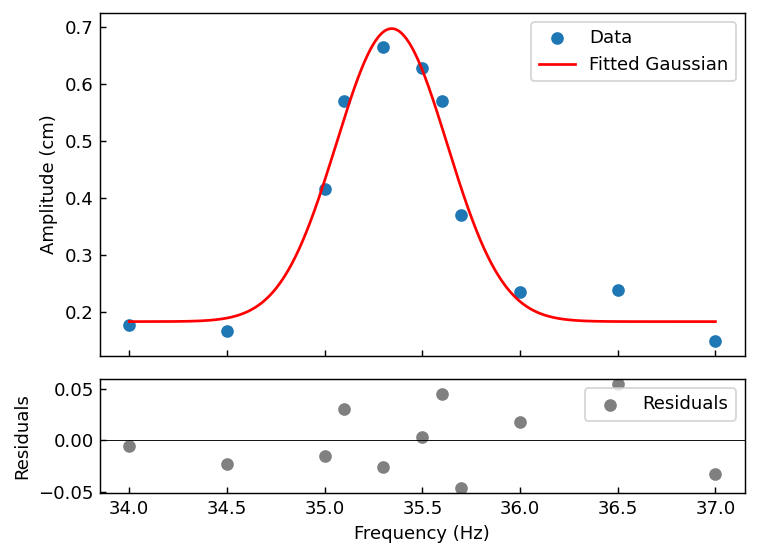

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from lmfit.models import GaussianModel, ConstantModel
from lmfit import Parameters

# Read data from Excel file
df = pd.read_excel('data.xlsx', sheet_name='Sheet1')

# Get x and y column data
x = df['周波数(Hz)'].values
y = df['振幅(cm)'].values

# Apply Gaussian model with y-intercept
model = ConstantModel() + GaussianModel()

# Set initial guesses for the parameters
params = Parameters()
params.add_many(
    ('c', np.mean(y)),
    ('amplitude', np.max(y) - np.min(y)),
    ('center', x[np.argmax(y)]),
    ('sigma', (np.max(x) - np.min(x)) / 10),
)

# Perform the fitting
result = model.fit(y, params, x=x)
print(result.fit_report())

# Generate a smooth x-axis for plotting the fitted curve
x_smooth = np.linspace(min(x), max(x), 1000)
y_smooth = result.eval(params=result.params, x=x_smooth)

# Visualize the fitting results
fig, axes = plt.subplots(2, 1, dpi=130, sharex=True, gridspec_kw={'height_ratios': [3, 1], 'hspace': 0.1})
axes[0].scatter(x, y, label='Data')
axes[0].plot(x_smooth, y_smooth, 'r', label='Fitted Gaussian')
axes[0].set_ylabel('Amplitude (cm)')
axes[0].legend()
axes[0].tick_params(direction='in')

# Plot the residuals
residuals = y - result.eval(params=result.params, x=x)
axes[1].scatter(x, residuals, color='gray', label='Residuals')
axes[1].axhline(0, color='black', linewidth=0.5)
axes[1].set_xlabel('Frequency (Hz)')
axes[1].set_ylabel('Residuals')
axes[1].legend()
#save the figure
plt.tick_params(direction='in')
plt.savefig('figs/fitting_gaussian.pdf', dpi=300)
plt.show()


[[Model]]
    (Model(constant) + Model(lorentzian))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 41
    # data points      = 17
    # variables        = 4
    chi-square         = 0.03238279
    reduced chi-square = 0.00249098
    Akaike info crit   = -98.4768033
    Bayesian info crit = -95.1439499
    R-squared          = 0.97770371
[[Variables]]
    c:          0.10468494 +/- 0.02344273 (22.39%) (init = 0.4230588)
    amplitude:  1.73981311 +/- 0.15174655 (8.72%) (init = 0.98)
    center:     33.4088667 +/- 0.02690171 (0.08%) (init = 33.4)
    sigma:      0.64232296 +/- 0.05430363 (8.45%) (init = 0.8)
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = +0.8768
    C(c, amplitude)     = -0.8347
    C(c, sigma)         = -0.6399


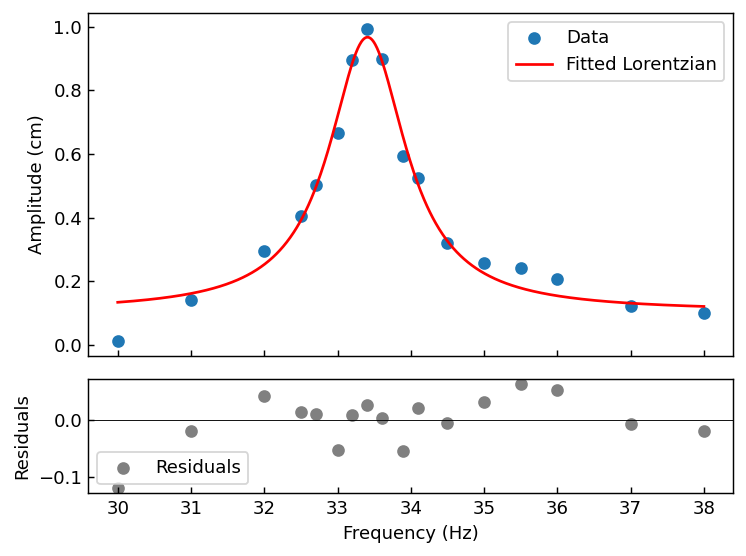

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from lmfit.models import LorentzianModel, ConstantModel
from lmfit import Parameters

# Read data from Excel file
df = pd.read_excel('data.xlsx', sheet_name='Sheet2')

# Get x and y column data
x = df['周波数(Hz)'].values
y = df['振幅(cm)'].values

# Apply Lorentzian model with y-intercept
model = ConstantModel() + LorentzianModel()

# Set initial guesses for the parameters
params = Parameters()
params.add_many(
    ('c', np.mean(y)),
    ('amplitude', np.max(y) - np.min(y)),
    ('center', x[np.argmax(y)]),
    ('sigma', (np.max(x) - np.min(x)) / 10),
)

# Perform the fitting
result = model.fit(y, params, x=x)
print(result.fit_report())

# Generate a smooth x-axis for plotting the fitted curve
x_smooth = np.linspace(min(x), max(x), 1000)
y_smooth = result.eval(params=result.params, x=x_smooth)

# Visualize the fitting results
fig, axes = plt.subplots(2, 1, dpi=130, sharex=True, gridspec_kw={'height_ratios': [3, 1], 'hspace': 0.1})
axes[0].scatter(x, y, label='Data')
axes[0].plot(x_smooth, y_smooth, 'r', label='Fitted Lorentzian')
axes[0].set_ylabel('Amplitude (cm)')
axes[0].legend()
# direction - in
axes[0].tick_params(direction='in')

# Plot the residuals
residuals = y - result.eval(params=result.params, x=x)
axes[1].scatter(x, residuals, color='gray', label='Residuals')
axes[1].axhline(0, color='black', linewidth=0.5)
axes[1].set_xlabel('Frequency (Hz)')
axes[1].set_ylabel('Residuals')
axes[1].legend()
#save the figure
plt.tick_params(direction='in')
plt.savefig('figs/fitting_Lorentzian2.pdf', dpi=300)
plt.show()

[[Model]]
    (Model(constant) + Model(gaussian))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 41
    # data points      = 17
    # variables        = 4
    chi-square         = 0.07563647
    reduced chi-square = 0.00581819
    Akaike info crit   = -84.0555111
    Bayesian info crit = -80.7226578
    R-squared          = 0.94792257
[[Variables]]
    c:          0.16643894 +/- 0.02838410 (17.05%) (init = 0.4230588)
    amplitude:  1.07436955 +/- 0.10733169 (9.99%) (init = 0.98)
    center:     33.4029934 +/- 0.04217970 (0.13%) (init = 33.4)
    sigma:      0.56764024 +/- 0.05117976 (9.02%) (init = 0.8)
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = +0.7591
    C(c, amplitude)     = -0.7462
    C(c, sigma)         = -0.4793


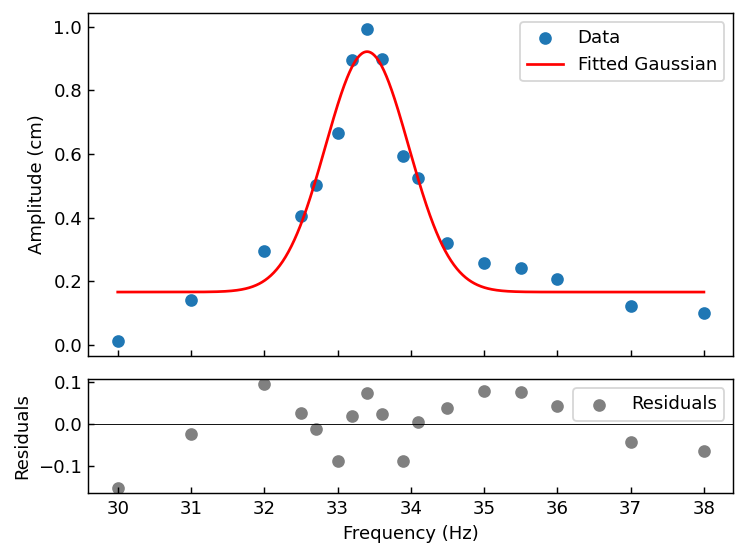

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from lmfit.models import GaussianModel, ConstantModel
from lmfit import Parameters

# Read data from Excel file
df = pd.read_excel('data.xlsx', sheet_name='Sheet2')

# Get x and y column data
x = df['周波数(Hz)'].values
y = df['振幅(cm)'].values

# Apply Gaussian model with y-intercept
model = ConstantModel() + GaussianModel()

# Set initial guesses for the parameters
params = Parameters()
params.add_many(
    ('c', np.mean(y)),
    ('amplitude', np.max(y) - np.min(y)),
    ('center', x[np.argmax(y)]),
    ('sigma', (np.max(x) - np.min(x)) / 10),
)

# Perform the fitting
result = model.fit(y, params, x=x)
print(result.fit_report())

# Generate a smooth x-axis for plotting the fitted curve
x_smooth = np.linspace(min(x), max(x), 1000)
y_smooth = result.eval(params=result.params, x=x_smooth)

# Visualize the fitting results
fig, axes = plt.subplots(2, 1, dpi=130, sharex=True, gridspec_kw={'height_ratios': [3, 1], 'hspace': 0.1})
axes[0].scatter(x, y, label='Data')
axes[0].plot(x_smooth, y_smooth, 'r', label='Fitted Gaussian')
axes[0].set_ylabel('Amplitude (cm)')
axes[0].legend()
axes[0].tick_params(direction='in')

# Plot the residuals
residuals = y - result.eval(params=result.params, x=x)
axes[1].scatter(x, residuals, color='gray', label='Residuals')
axes[1].axhline(0, color='black', linewidth=0.5)
axes[1].set_xlabel('Frequency (Hz)')
axes[1].set_ylabel('Residuals')
axes[1].legend()
#save the figure
plt.tick_params(direction='in')
plt.savefig('figs/fitting_gaussian2.pdf', dpi=300)
plt.show()


    周波数(Hz)
0      35.5
1      36.0
2      36.5
3      35.3
4      35.7
5      37.0
6      35.0
7      34.5
8      35.6
9      35.1
10     34.0
